In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
!pip install --upgrade pip
!pip install --upgrade tensorflow-gpu
!pip install --upgrade tensorflow
!pip install --upgrade keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 25.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2
  Preparing metadata (setup.py) ... - error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      Traceback (most recent call last):
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_vendor/packaging/requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_vendor/packaging/_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_vendor/packaging/_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_re

In [3]:
path="/kaggle/input/creditcardfraud/creditcard.csv"

In [4]:
df=pd.read_csv(path)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
fine=df[df["Class"]==0]
fraud=df[df["Class"]==1]
print("shape of fine: ",fine.shape)
print("shape of fraud: ", fraud.shape)
print(fraud.shape[0]/fine.shape[0]*100, " % of the data is fraud")

shape of fine:  (284315, 31)
shape of fraud:  (492, 31)
0.17304750013189596  % of the data is fraud


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fine.drop(columns=['Class']), fine['Class'], shuffle=True, test_size=0.2,random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
fraudX=scaler.transform(fraud.drop(columns=['Class']))
X_test=scaler.transform(X_test)

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

2024-07-30 14:19:34.139596: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-30 14:19:34.157035: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-30 14:19:34.163367: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [10]:
# model.add(layers.Dropout(0.3))

# Build the Autoencoder Model
def build_autoencoder(input_shape):
    model = models.Sequential()

    # Encoder part
    model.add(layers.InputLayer(shape=(input_shape,)))
    
    model.add(layers.Dense(2000))
    model.add(layers.LeakyReLU(negative_slope=0.1)) 
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Dense(1000))
    model.add(layers.LeakyReLU(negative_slope=0.1))
    model.add(layers.Dropout(0.2))
     
    model.add(layers.Dense(750))
    model.add(layers.LeakyReLU(negative_slope=0.1))

    model.add(layers.Dense(500))
    model.add(layers.LeakyReLU(negative_slope=0.1))

    model.add(layers.Dense(750))
    model.add(layers.LeakyReLU(negative_slope=0.1))

    model.add(layers.Dense(1000))
    model.add(layers.LeakyReLU(negative_slope=0.1))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Dense(2000))
    model.add(layers.LeakyReLU(negative_slope=0.1))
    model.add(layers.Dropout(0.2))

    model.add(layers.Dense(260))
    model.add(layers.LeakyReLU(negative_slope=0.1))

    model.add(layers.Dense(input_shape, activation='linear'))

    return model

input_shape = X_train.shape[1]
autoencoder = build_autoencoder(input_shape)

# Compile the Model
autoencoder.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint_path = "/kaggle/input/creditcardfraud/autoencoder_weights.weights.h5"
# checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, save_weights_only=True, verbose=1)

# Train the Autoencoder
history = autoencoder.fit(
    X_train, 
    X_train, 
    epochs=80, 
    batch_size=640, 
    shuffle=False, 
    validation_data=(X_test, X_test),
    callbacks=[early_stopping]
)

I0000 00:00:1722349178.833866      25 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722349179.000356      25 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722349179.000662      25 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722349179.007044      25 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Epoch 1/80


I0000 00:00:1722349182.245551      91 service.cc:146] XLA service 0x7d0580011210 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1722349182.245597      91 service.cc:154]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 24/356 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.8790

I0000 00:00:1722349185.281847      91 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


356/356 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 0.2805 - val_loss: 0.0797
Epoch 2/80
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1219 - val_loss: 0.0728
Epoch 3/80
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1188 - val_loss: 0.0596
Epoch 4/80
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1128 - val_loss: 0.0608
Epoch 5/80
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1047 - val_loss: 0.0797
Epoch 6/80
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1203 - val_loss: 0.0514
Epoch 7/80
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0991 - val_loss: 0.0724
Epoch 8/80
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0827 - val_loss: 0.0707
Epoch 9/80
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1227 - val_loss: 0.0709


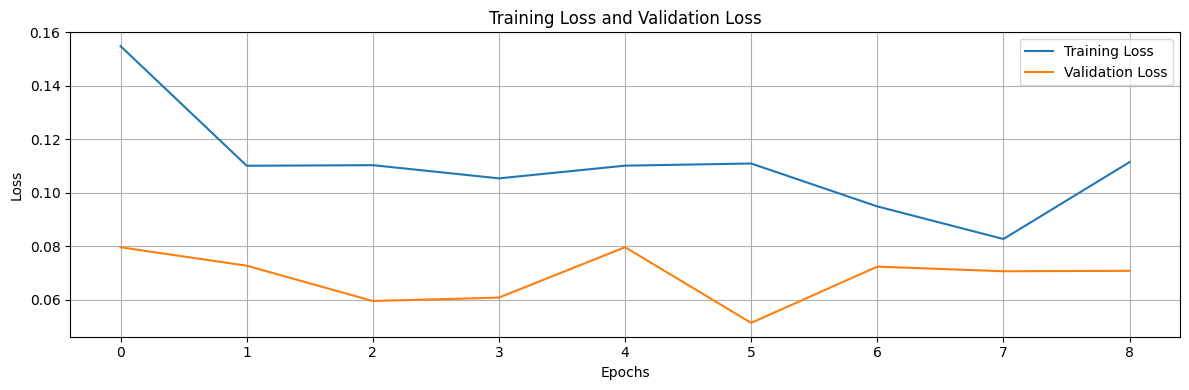

In [11]:
# Plot Loss vs. Accuracy
plt.figure(figsize=(12, 4))

# Plot Training Loss
plt.subplot(1, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()


plt.tight_layout()
plt.show()

In [12]:
predictions_fraud = autoencoder.predict(fraudX)
mse_fraud = np.mean(np.power(fraudX - predictions_fraud, 2), axis=1)

predictions_fine = autoencoder.predict(X_test)
mse_fine = np.mean(np.power(X_test - predictions_fine, 2), axis=1)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


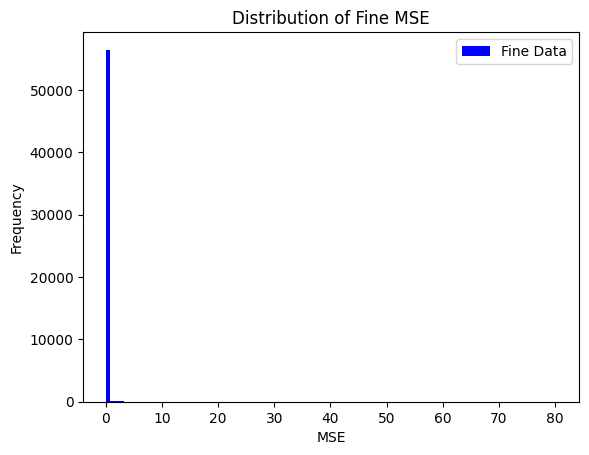

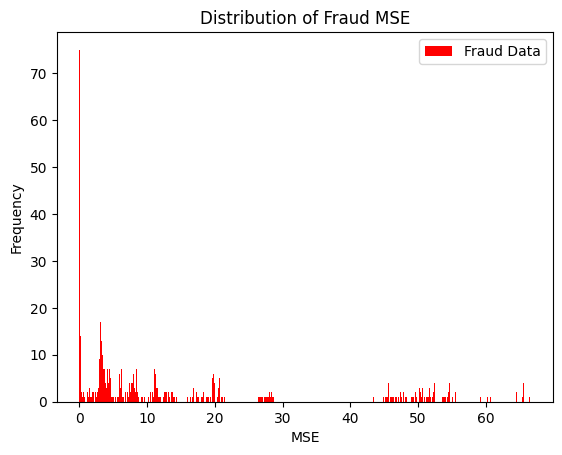

In [13]:
bins = 100

# Plot the distributions on the same graph
plt.hist(mse_fine, bins=bins, color='blue', alpha=1, label='Fine Data')
plt.xlabel('MSE')
plt.ylabel('Frequency')
plt.title('Distribution of Fine MSE')
# plt.xlim(0, 20)
plt.legend(loc='upper right')
plt.show()

plt.hist(mse_fraud, bins=bins*5, color='red', alpha=1, label='Fraud Data')
plt.xlabel('MSE')
plt.ylabel('Frequency')
plt.title('Distribution of Fraud MSE')
# plt.xlim(0, 20)
plt.legend(loc='upper right')
plt.show()


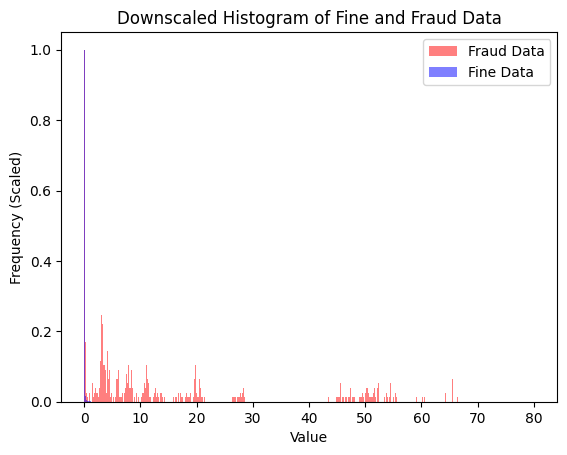

In [14]:
bins = 500  # Number of bins for the histogram

# Compute histograms
hist_fine, bin_edges_fine = np.histogram(mse_fine, bins=bins)
hist_fraud, bin_edges_fraud = np.histogram(mse_fraud, bins=bins)

# Ensure the bin edges are the same
bin_edges = np.linspace(min(bin_edges_fine[0], bin_edges_fraud[0]), max(bin_edges_fine[-1], bin_edges_fraud[-1]), bins + 1)
hist_fine, _ = np.histogram(mse_fine, bins=bin_edges)
hist_fraud, _ = np.histogram(mse_fraud, bins=bin_edges)

# Scale the histograms
scaling_factor_fine = 1 / hist_fine.max()
scaling_factor_fraud = 1 / hist_fraud.max()
hist_scaled_fine = hist_fine * scaling_factor_fine
hist_scaled_fraud = hist_fraud * scaling_factor_fraud

# Plot the downscaled histograms
plt.bar(bin_edges[:-1], hist_scaled_fraud, width=np.diff(bin_edges), color='red', alpha=0.5, label='Fraud Data')
plt.bar(bin_edges[:-1], hist_scaled_fine, width=np.diff(bin_edges), color='blue', alpha=0.5, label='Fine Data')
plt.xlabel('Value')
plt.ylabel('Frequency (Scaled)')
plt.title('Downscaled Histogram of Fine and Fraud Data')
plt.legend()
plt.show()

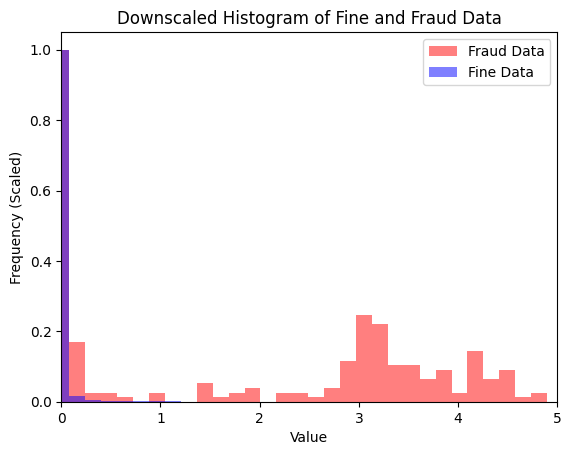

In [15]:
bins = 500  # Number of bins for the histogram

# Compute histograms
hist_fine, bin_edges_fine = np.histogram(mse_fine, bins=bins)
hist_fraud, bin_edges_fraud = np.histogram(mse_fraud, bins=bins)

# Ensure the bin edges are the same
bin_edges = np.linspace(min(bin_edges_fine[0], bin_edges_fraud[0]), max(bin_edges_fine[-1], bin_edges_fraud[-1]), bins + 1)
hist_fine, _ = np.histogram(mse_fine, bins=bin_edges)
hist_fraud, _ = np.histogram(mse_fraud, bins=bin_edges)

# Scale the histograms
scaling_factor_fine = 1 / hist_fine.max()
scaling_factor_fraud = 1 / hist_fraud.max()
hist_scaled_fine = hist_fine * scaling_factor_fine
hist_scaled_fraud = hist_fraud * scaling_factor_fraud

# Plot the downscaled histograms
plt.bar(bin_edges[:-1], hist_scaled_fraud, width=np.diff(bin_edges), color='red', alpha=0.5, label='Fraud Data')
plt.bar(bin_edges[:-1], hist_scaled_fine, width=np.diff(bin_edges), color='blue', alpha=0.5, label='Fine Data')
plt.xlabel('Value')
plt.ylabel('Frequency (Scaled)')
plt.title('Downscaled Histogram of Fine and Fraud Data')
plt.legend()
plt.xlim(0,5)
plt.show()

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the Autoencoder
predictions = autoencoder.predict(np.concatenate((X_test,fraudX), axis=0))
mse = np.mean(np.power(np.concatenate((X_test,fraudX), axis=0) - predictions, 2), axis=1)

# Ground truth for anomalies
y_true = np.concatenate((np.array(y_test), fraud['Class'].values))

# Lists to store metrics
thresholds = np.linspace(0, 5, 300)
precisions = []
recalls = []
f1_scores = []

# Loop over different thresholds
for threshold in thresholds:
    # Classify anomalies based on the threshold
    anomalies = mse > threshold
    y_pred = anomalies.astype(int)

    # Calculate precision, recall, and f1 score for class 1
    try:
        precision = precision_score(y_true, y_pred, pos_label=1,zero_division=0)
    except ValueError:
        precision = 0.0
    try:
        recall = recall_score(y_true, y_pred, pos_label=1,zero_division=0)
    except ValueError:
        recall = 0.0
    try:
        f1 = f1_score(y_true, y_pred, pos_label=1,zero_division=0)
    except ValueError:
        f1 = 0.0

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)


1793/1793 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [17]:
import plotly.express as px

# Create a DataFrame
df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Melt the DataFrame
df_melted = df.melt(id_vars='Threshold', var_name='Metric', value_name='Score')

# Create the plot
fig = px.line(df_melted, x='Threshold', y='Score', color='Metric',
              title='Threshold vs Precision, Recall, and F1 Score',
              labels={'Score': 'Score', 'Threshold': 'Threshold'},
              template='plotly_white')

# Show the plot
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [18]:
from sklearn.metrics import classification_report

optimum_threshold=thresholds[np.argmax(f1_scores)]
# Classify anomalies based on the threshold
anomalies = mse > optimum_threshold
y_pred = anomalies.astype(int)

# Calculate precision, recall, and f1 score
report = classification_report(y_true, y_pred)

print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.79      0.76      0.78       492

    accuracy                           1.00     57355
   macro avg       0.89      0.88      0.89     57355
weighted avg       1.00      1.00      1.00     57355



In [19]:
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(df_report.iloc[:-1, :].T, annot=True, cmap="Blues", cbar=False, fmt=".2f")

plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

ValueError: DataFrame constructor not properly called!